In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium, calculate
import numpy as np
from pycalphad.tests.datasets import *
dbf = Database('alzn_mey.tdb')

In [25]:
from pycalphad.core.solver import InteriorPointSolver
class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)
v.T.default_value = 750
eq2 = equilibrium(dbf, ['AL', 'ZN', 'VA'], ['FCC_A1', 'LIQUID'],
                 {v.X('ZN'): (1e-4,1-1e-4,0.1), v.NP('LIQUID'): 1e-1,
                  v.P: 1e5}, verbose=False, solver=ProblemSaver())
print(eq2)

('Composition Sets', [CompositionSet(FCC_A1, [ 0.73146293  0.26853707], NP=1.7965430851063857, GM=-31587.37618250951), CompositionSet(LIQUID, [ 0.35470942  0.64529058], NP=1e-06, GM=-35896.89399223831), CompositionSet(LIQUID, [ 0.03807615  0.96192385], NP=0.1 [fixed], GM=-38446.858947256595)])
('Chemical Potentials', array([-28515.69859472, -39954.25916416]))
Trying to improve poor solution
Calculation Failed:  OrderedDict([('N', array(1.0)), ('NP_LIQUID', array(0.1)), ('P', array(100000.0)), ('X_ZN', array(0.0001))]) b'Maximum number of iterations exceeded (can be specified by an option).'
Chemical Potentials [-25286.39444119 -74325.43794541]
[  9.99334340e-01   1.00000000e+05   6.95019480e-01   1.11834660e-06
  -5.82076609e-10  -1.13526516e-06   1.00000000e+06   6.29154616e+01
  -3.35711076e+03  -1.64092909e+02]
[  9.99334340e-01   1.00000000e+05   8.85313727e+02   9.99998433e-01
   1.56728991e-06   1.26888221e-01   8.73111779e-01   9.99998858e-01
   1.14248531e-06   3.04909917e-01  

Trying to improve poor solution
Chemical Potentials [-11127.23372727 -12763.28511624]
[  1.00000000e+00   1.00000000e+05   1.00000000e-01  -4.36557457e-11
   0.00000000e+00   1.00000000e+06   2.00100000e+05   1.00000000e+02
  -1.00000000e+02]
[  1.00000000e+00   1.00000000e+05   3.77904277e+02   8.88021441e-01
   1.11978559e-01   6.80703196e-03   9.93192968e-01   9.00000000e-01
   1.00000000e-01]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
('Composition Sets', [CompositionSet(FCC_A1, [ 0.77354709  0.22645291], NP=0.8501000000001995, GM=-31098.293840257138), CompositionSet(FCC_A1, [ 0.77154309  0.22845691], NP=0.049899999999800555, GM=-31121.973816137543), CompositionSet(LIQUID, [ 0.03807615  0.96192385], NP=0.1 [fixed], GM=-38446.858947256595)])
('Chemical Potentials', array([-28422.45656577, -40238.76453009]))
Trying to improve poor solution
Chemical Potentials [-29344.09810986 -41124.8

In [26]:
eq2.GM - ((eq2.NP.isel(vertex=0) * eq2.MU * eq2.X.isel(vertex=0)).sum() + 
          (eq2.NP.isel(vertex=1) * (eq2.MU * eq2.X.isel(vertex=1)).sum()) + 
          (eq2.NP.isel(vertex=2) * (eq2.MU * eq2.X.isel(vertex=2)).sum()))

<xarray.DataArray (N: 1, P: 1, NP_LIQUID: 1, X_ZN: 10)>
array([[[[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]]]])
Coordinates:
  * N          (N) float64 1.0
  * NP_LIQUID  (NP_LIQUID) float64 0.1
  * P          (P) float64 1e+05
  * X_ZN       (X_ZN) float64 0.0001 0.1001 0.2001 0.3001 0.4001 0.5001 ...
    vertex     int64 2

In [29]:
eq2.X

<xarray.DataArray 'X' (N: 1, P: 1, NP_LIQUID: 1, X_ZN: 10, vertex: 3, component: 2)>
array([[[[[[  9.999661e-01,   3.394117e-05],
           [  9.993055e-01,   6.945295e-04],
           [           nan,            nan]],

          [[           nan,            nan],
           [           nan,            nan],
           [           nan,            nan]],

          [[  8.880214e-01,   1.119786e-01],
           [  6.807032e-03,   9.931930e-01],
           [           nan,            nan]],

          [[  7.285375e-01,   2.714625e-01],
           [  4.421629e-01,   5.578371e-01],
           [           nan,            nan]],

          [[           nan,            nan],
           [           nan,            nan],
           [           nan,            nan]],

          [[  5.038035e-01,   4.961965e-01],
           [  4.647681e-01,   5.352319e-01],
           [           nan,            nan]],

          [[  3.999000e-01,   6.001000e-01],
           [  3.999000e-01,   6.001000e-01],
   

In [23]:
fcc = calculate(dbf, ['AL', 'ZN', 'VA'], 'FCC_A1',
                 T=float(eq2['T']), P=1e5)
hcp = calculate(dbf, ['AL', 'ZN', 'VA'], 'HCP_A3',
                 T=float(eq2['T']), P=1e5)
liq = calculate(dbf, ['AL', 'ZN', 'VA'], 'LIQUID',
                 T=float(eq2['T']), P=1e5)

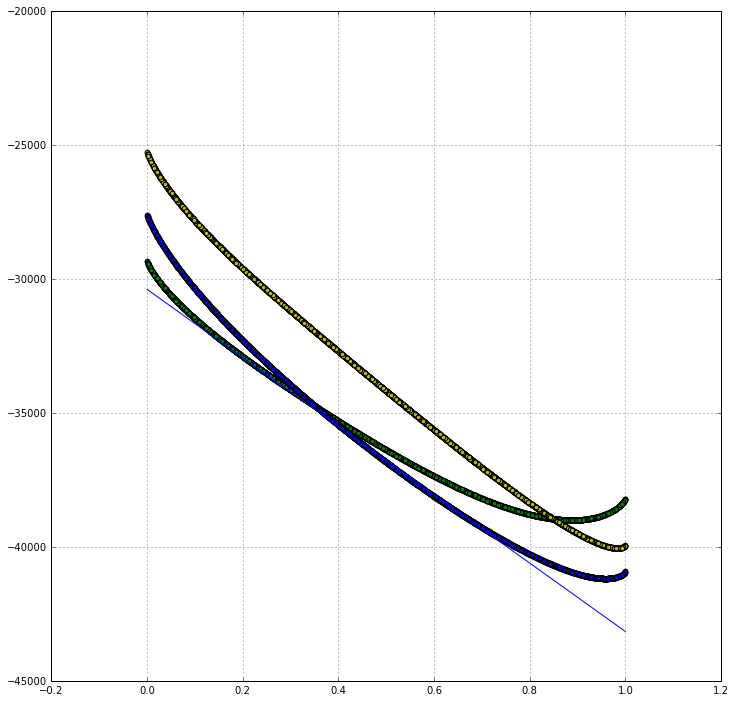

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,12))
plt.scatter(fcc.X.sel(component='ZN').values.flatten(),
            fcc.GM.values.flatten(), c='g')
plt.scatter(hcp.X.sel(component='ZN').values.flatten(),
            hcp.GM.values.flatten(), c='y')
plt.scatter(liq.X.sel(component='ZN').values.flatten(),
            liq.GM.values.flatten(), c='b')
plt.plot([0,1], eq2.MU.values.flatten())
plt.scatter([0.25], [float(eq2.GM)])
plt.grid(True)

In [8]:
eq2.Y

<xarray.DataArray 'Y' (N: 1, P: 1, NP_LIQUID: 1, X_ZN: 1, vertex: 3, internal_dof: 2)>
array([[[[[[ 0.991224,  0.008776],
           [ 0.749976,  0.250024],
           [      nan,       nan]]]]]])
Coordinates:
  * N          (N) float64 1.0
  * NP_LIQUID  (NP_LIQUID) float64 0.9999
  * P          (P) float64 1e+05
  * X_ZN       (X_ZN) float64 0.25
  * vertex     (vertex) int64 0 1 2
Dimensions without coordinates: internal_dof

In [ ]:
eq2.MU

In [ ]:
eq2.GM

In [ ]:
import numpy as np
def constraint_calculator(temps):
    # Should be zero at T=800
    x_in = [1.0, 101325, 800, 0.828636,  0.171364, 0.549538,  0.450462, 0.7183, 0.2817]
    #x_in = [1.0, 101325, 800, 1-1e-4, 1e-4, 1e-6, 1-1e-6,  0.7183, 0.2817]
    #x_in = [1.0, 101325, 800,  9.58792139e-01, 4.12078612e-02,
    #                           1.11325490e-03, 9.98886745e-01,
    #        7.81981056e-01, 2.18018944e-01]
    #x_in = [1.0, 101325, 800,  9.58792139e-01, 4.12078612e-02,
    #                           1.11325490e-03, 9.98886745e-01,
    #        0.5, 0.5]
    desired_chempots = [-31050.173963, -45108.31854]
    cons = []
    total_chempots = []
    fixed_chempots = []
    free_chempots_1 = []
    free_chempots_2 = []
    for temp in temps:
        x_in[2] = temp
        cons.append(ProblemSaver.saved_problem[0].constraints(x_in))
        total_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in))
        fixed_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=1))
        free_chempots_1.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=0))
        free_chempots_2.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, free_only=True))
    cons = np.array(cons - np.array(ProblemSaver.saved_problem[0].cl))
    total_chempots = np.array(total_chempots) - np.array(desired_chempots)
    fixed_chempots = np.array(fixed_chempots) - np.array(desired_chempots)
    free_chempots_1 = np.array(free_chempots_1) - np.array(desired_chempots)
    free_chempots_2 = np.array(free_chempots_2) - np.array(desired_chempots)
    return cons, total_chempots, fixed_chempots, free_chempots_1, free_chempots_2

def constraint_calculator_2(xfccs):
    # Should be zero at T=800
    x_in = [1.0, 101325, 800, 0.828636,  0.171364, 0.549538,  0.450462, 0.7183, 0.2817]
    desired_chempots = [-31050.173963, -45108.31854]
    cons = []
    total_chempots = []
    fixed_chempots = []
    free_chempots_1 = []
    free_chempots_2 = []
    for xfcc in xfccs:
        x_in[2] = 300
        x_in[3] = xfcc
        x_in[4] - 1-xfcc
        cons.append(ProblemSaver.saved_problem[0].constraints(x_in))
        total_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in))
        fixed_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=1))
        free_chempots_1.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=0))
        free_chempots_2.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, free_only=True))
    cons = np.array(cons - np.array(ProblemSaver.saved_problem[0].cl))
    total_chempots = np.array(total_chempots) - np.array(desired_chempots)
    fixed_chempots = np.array(fixed_chempots) - np.array(desired_chempots)
    free_chempots_1 = np.array(free_chempots_1) - np.array(desired_chempots)
    free_chempots_2 = np.array(free_chempots_2) - np.array(desired_chempots)
    return cons, total_chempots, fixed_chempots, free_chempots_1, free_chempots_2

temps = np.arange(300., 2000., step=100)
xfccs = np.linspace(1e-6,1-1e-6, num=100)
results = constraint_calculator(temps)
results_2 = constraint_calculator_2(xfccs)

%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot(temps, results[0][:, -2], label='cons 1')
#plt.plot(temps, results[0][:, -1], label='cons 2')
#plt.plot(temps, results[1][:, 0], label='total')
#plt.plot(temps, results[2][:, 0], label='fixed')
#plt.plot(temps, results[3][:, 0], label='free 1')
#plt.plot(temps, results[4][:, 0], label='free 2')
#plt.ylim((-1000, 1000))
#plt.xlim((700, 900))
plt.plot(xfccs, results_2[0][:, -2], label='cons 1')
plt.plot(xfccs, results_2[0][:, -1], label='cons 2')
plt.plot([])
plt.legend(loc='best')

In [27]:
results[0]

array([[  0.00000000e+00,   1.32500000e+03,   1.81700000e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -1.40934000e+01,   4.71539807e+03,  -4.69174589e+03],
       [  0.00000000e+00,   1.32500000e+03,   1.81700000e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -1.40934000e+01,   3.79624517e+03,  -3.73303894e+03],
       [  0.00000000e+00,   1.32500000e+03,   1.81700000e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -1.40934000e+01,   2.87653096e+03,  -2.77434662e+03],
       [  0.00000000e+00,   1.32500000e+03,   1.81700000e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -1.40934000e+01,   1.95516302e+03,  -1.81569737e+03],
       [  0.00000000e+00,   1.32500000e+03,   1.81700000e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -1.40934000e+01,   1.02976152e+03,  -8.57153747e+02],
       [  0.00000000e+00,   1.32500000e+03,   1.81700000e-01,
   